In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
import matplotlib.pyplot as plt
import numpy as np
import os

In [10]:
# Dataset directory
train_dir = "D:\[PC] S E M 6\ISB46703 - PRINCIPLES OF ARTIFICIAL INTELLIGENCE\Project\deep-learning\Dataset\Test"
val_dir = "D:\[PC] S E M 6\ISB46703 - PRINCIPLES OF ARTIFICIAL INTELLIGENCE\Project\deep-learning\Dataset\Train"
test_dir = "D:\[PC] S E M 6\ISB46703 - PRINCIPLES OF ARTIFICIAL INTELLIGENCE\Project\deep-learning\Dataset\Valid"

# Model parameters
num_classes = 4  # Specify the number of classes in your dataset
input_shape = (224, 224, 3)  # Input shape expected by MobileNetV3


# Training parameters
batch_size = 32
epochs = 5
learning_rate = 0.001

In [11]:
# Data augmentation and generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 600 images belonging to 4 classes.
Found 2800 images belonging to 4 classes.


In [12]:
# Load pre-trained MobileNetV3-Large model
base_model = tf.keras.applications.MobileNetV3Large(weights='imagenet', include_top=False, input_shape=input_shape)

# Add GlobalAveragePooling2D layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add Dense layer for classification (adjust units based on your number of classes)
predictions = Dense(num_classes, activation='softmax')(x)

# Final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile model
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
import tensorflow as tf

# Print GPU devices
physical_devices = tf.config.list_physical_devices('GPU')
print("Available GPU devices:", physical_devices)


Available GPU devices: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Epoch 1/5
19/19 [==============================] - ETA: 0s - loss: 0.3405 - accuracy: 0.8683  
Epoch 1: val_accuracy improved from -inf to 0.25929, saving model to best_model_mobilenetv3.h5
19/19 [==============================] - 39s 1s/step - loss: 0.3405 - accuracy: 0.8683 - val_loss: 1.5021 - val_accuracy: 0.2593
Epoch 2/5
19/19 [==============================] - ETA: 0s - loss: 0.0514 - accuracy: 0.9867 
Epoch 2: val_accuracy did not improve from 0.25929
19/19 [==============================] - 28s 2s/step - loss: 0.0514 - accuracy: 0.9867 - val_loss: 1.5122 - val_accuracy: 0.2500
Epoch 3/5
19/19 [==============================] - ETA: 0s - loss: 0.0631 - accuracy: 0.9833 
Epoch 3: val_accuracy improved from 0.25929 to 0.27464, saving model to best_model_mobilenetv3.h5
19/19 [==============================] - 33s 2s/step - loss: 0.0631 - accuracy: 0.9833 - val_loss: 1.4102 - val_accuracy: 0.2746
Epoch 4/5
19/19 [==============================] - ETA: 0s - loss: 0.0295 - accuracy: 

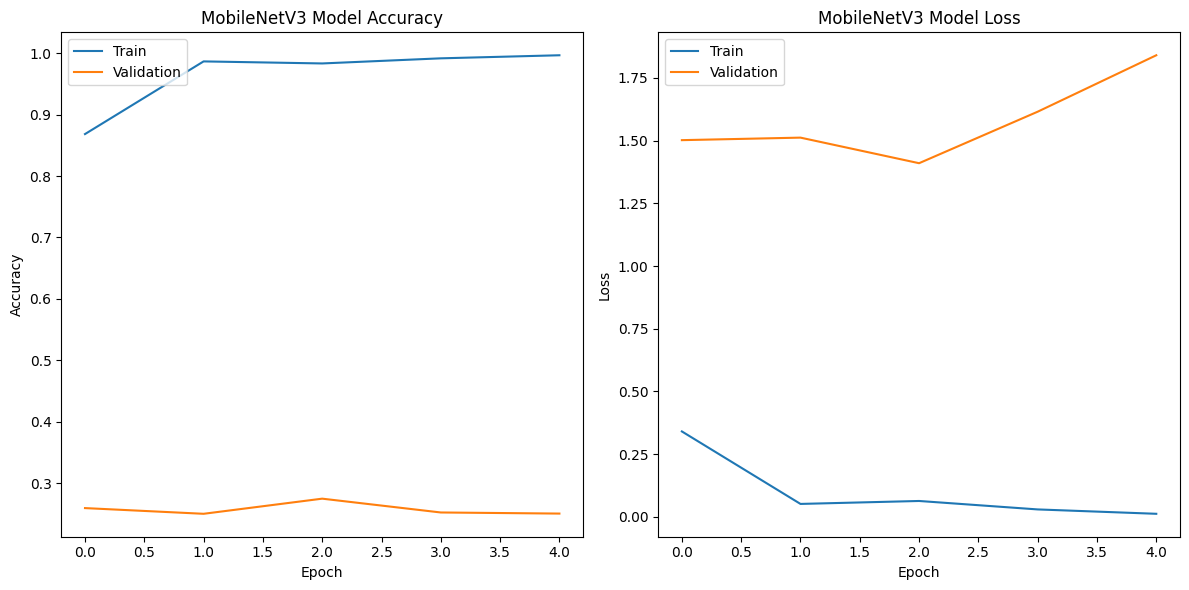

In [14]:
# Callbacks
checkpoint = ModelCheckpoint('best_model_mobilenetv3.h5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)


# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=[checkpoint]
)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MobileNetV3 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MobileNetV3 Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

Found 600 images belonging to 4 classes.
19/19 [==============================] - 5s 122ms/step


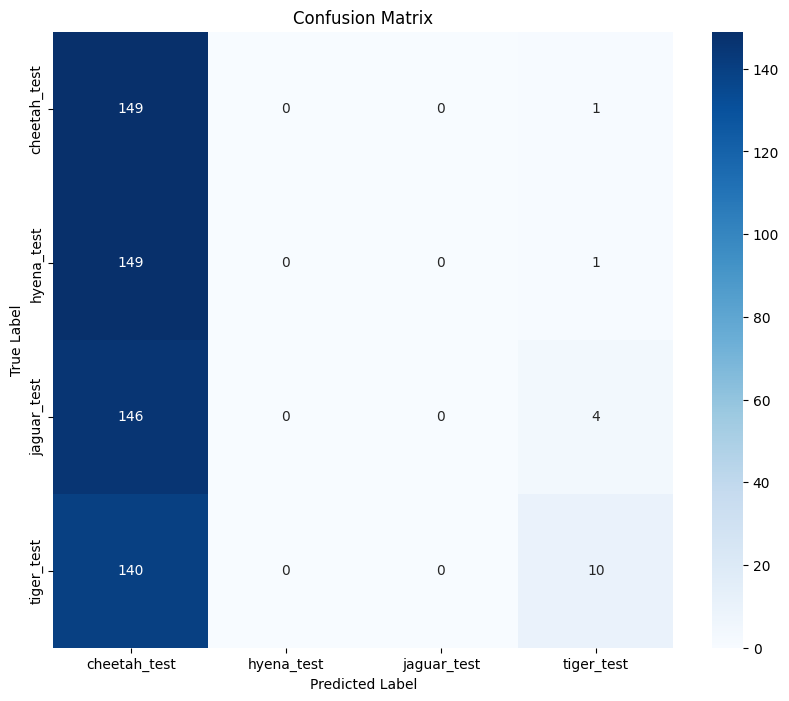

              precision    recall  f1-score   support

cheetah_test       0.26      0.99      0.41       150
  hyena_test       0.00      0.00      0.00       150
 jaguar_test       0.00      0.00      0.00       150
  tiger_test       0.62      0.07      0.12       150

    accuracy                           0.27       600
   macro avg       0.22      0.27      0.13       600
weighted avg       0.22      0.27      0.13       600



C:\Users\User\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\User\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\User\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0]

In [20]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Assuming dataset directories are defined
test_dir = "D:\[PC] S E M 6\ISB46703 - PRINCIPLES OF ARTIFICIAL INTELLIGENCE\Project\deep-learning\Dataset\Test"

# Load the best model
model = tf.keras.models.load_model('best_model_mobilenetv3.h5')

# Create test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,  # Adjust if needed
    class_mode='categorical',
    shuffle=False
)

# Get true labels and class indices
true_classes = test_generator.classes
class_indices = test_generator.class_indices
class_labels = list(class_indices.keys())

# Get predictions
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

Found 600 images belonging to 4 classes.
19/19 [==============================] - 6s 161ms/step


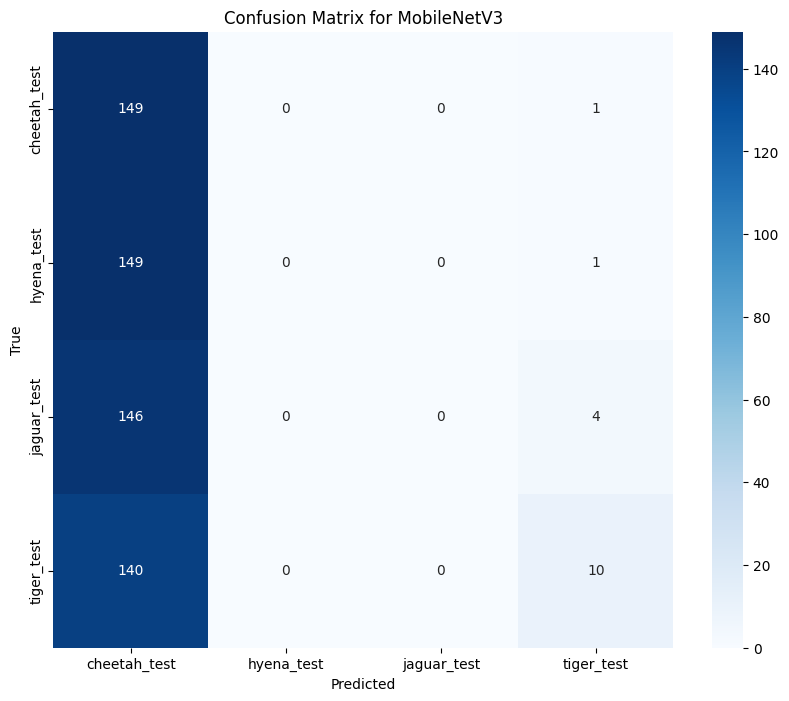

Classification Report for MobileNetV3
              precision    recall  f1-score   support

cheetah_test       0.26      0.99      0.41       150
  hyena_test       0.00      0.00      0.00       150
 jaguar_test       0.00      0.00      0.00       150
  tiger_test       0.62      0.07      0.12       150

    accuracy                           0.27       600
   macro avg       0.22      0.27      0.13       600
weighted avg       0.22      0.27      0.13       600



C:\Users\User\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\User\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\User\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0]

In [22]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Setup data (ensure these paths are correct and match your directory structure)
base_dir = r'D:\[PC] S E M 6\ISB46703 - PRINCIPLES OF ARTIFICIAL INTELLIGENCE\Project\deep-learning\Dataset'
test_dir = os.path.join(base_dir, 'Test')
img_height, img_width = 224, 224
batch_size = 32

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir, 
    target_size=(img_height, img_width), 
    batch_size=batch_size, 
    class_mode='categorical', 
    shuffle=False
)

# Load the trained model (ensure this path is correct)
mobilenetv3_model = tf.keras.models.load_model('best_model_mobilenetv3.h5')

# Predict using the loaded model
y_pred_mobilenetv3 = mobilenetv3_model.predict(test_generator)
y_true = test_generator.classes
y_pred_labels_mobilenetv3 = np.argmax(y_pred_mobilenetv3, axis=1)

# Plotting confusion matrices
classes = list(test_generator.class_indices.keys())  # Use the class names from the dataset

plot_confusion_matrix(y_true, y_pred_labels_mobilenetv3, classes, 'MobileNetV3')

# Print the classification report
print('Classification Report for MobileNetV3')
print(classification_report(y_true, y_pred_labels_mobilenetv3, target_names=classes))

Found 2800 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Epoch 1/50
88/88 [==============================] - ETA: 0s - loss: 0.1056 - accuracy: 0.9675  
Epoch 1: val_accuracy improved from -inf to 0.99000, saving model to best_mobilenetv3_small_model.h5
88/88 [==============================] - 23s 203ms/step - loss: 0.1056 - accuracy: 0.9675 - val_loss: 0.0483 - val_accuracy: 0.9900
Epoch 2/50
88/88 [==============================] - ETA: 0s - loss: 0.0262 - accuracy: 0.9950 
Epoch 2: val_accuracy did not improve from 0.99000
88/88 [==============================] - 13s 144ms/step - loss: 0.0262 - accuracy: 0.9950 - val_loss: 0.0540 - val_accuracy: 0.9900
Epoch 3/50
88/88 [==============================] - ETA: 0s - loss: 0.0219 - accuracy: 0.9950 
Epoch 3: val_accuracy did not improve from 0.99000
88/88 [==============================] - 15s 170ms/step - loss: 0.0219 - accuracy: 0.9950 - val_loss: 0.1080 - val_accuracy

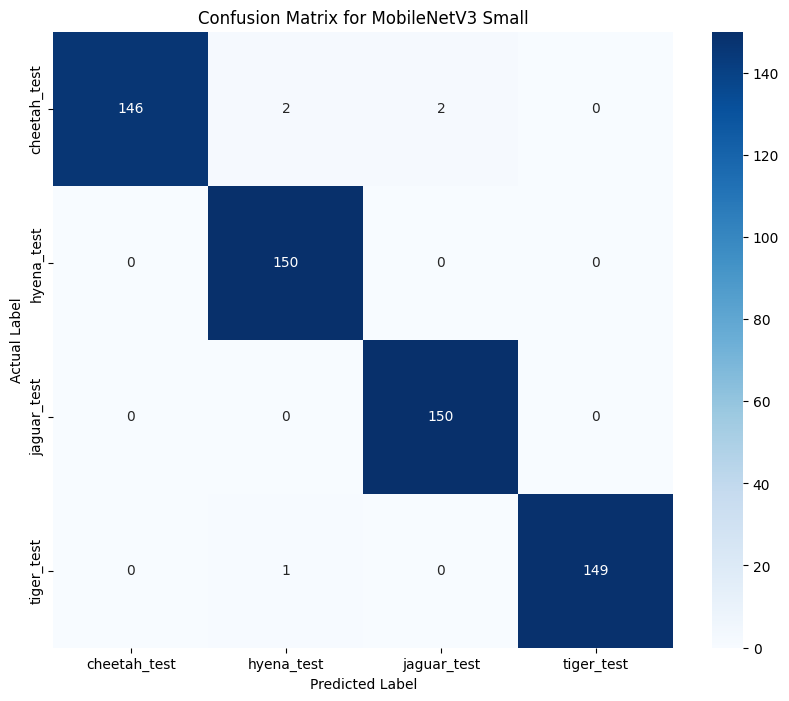

Classification Report for MobileNetV3 Small
              precision    recall  f1-score   support

cheetah_test       1.00      0.97      0.99       150
  hyena_test       0.98      1.00      0.99       150
 jaguar_test       0.99      1.00      0.99       150
  tiger_test       1.00      0.99      1.00       150

    accuracy                           0.99       600
   macro avg       0.99      0.99      0.99       600
weighted avg       0.99      0.99      0.99       600



In [24]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV3Large, MobileNetV3Small
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, average_precision_score
import matplotlib.pyplot as plt

# Define image dimensions
img_height, img_width = 224, 224
batch_size = 32

# Define paths
base_dir = r'D:\[PC] S E M 6\ISB46703 - PRINCIPLES OF ARTIFICIAL INTELLIGENCE\Project\deep-learning\Dataset'
train_dir = os.path.join(base_dir, 'Train')
val_dir = os.path.join(base_dir, 'Valid')
test_dir = os.path.join(base_dir, 'Test')

# Data generators with preprocessing
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Load the MobileNetV3 Small model
base_model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Build the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint('best_mobilenetv3_small_model.h5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)


# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=[checkpoint]
)

# Load the best model
model = tf.keras.models.load_model('best_mobilenetv3_small_model.h5')

# Predict using the loaded model
y_pred = model.predict(test_generator)
y_true = test_generator.classes
y_pred_labels = np.argmax(y_pred, axis=1)

# Accuracy and mAP calculation
accuracy = accuracy_score(y_true, y_pred_labels)
mean_ap = average_precision_score(tf.keras.utils.to_categorical(y_true), y_pred)

print(f"Accuracy: {accuracy}")
print(f"mAP: {mean_ap}")

# Confusion matrix
conf_mat = confusion_matrix(y_true, y_pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix for MobileNetV3 Small')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Print the classification report
print('Classification Report for MobileNetV3 Small')
print(classification_report(y_true, y_pred_labels, target_names=test_generator.class_indices.keys()))

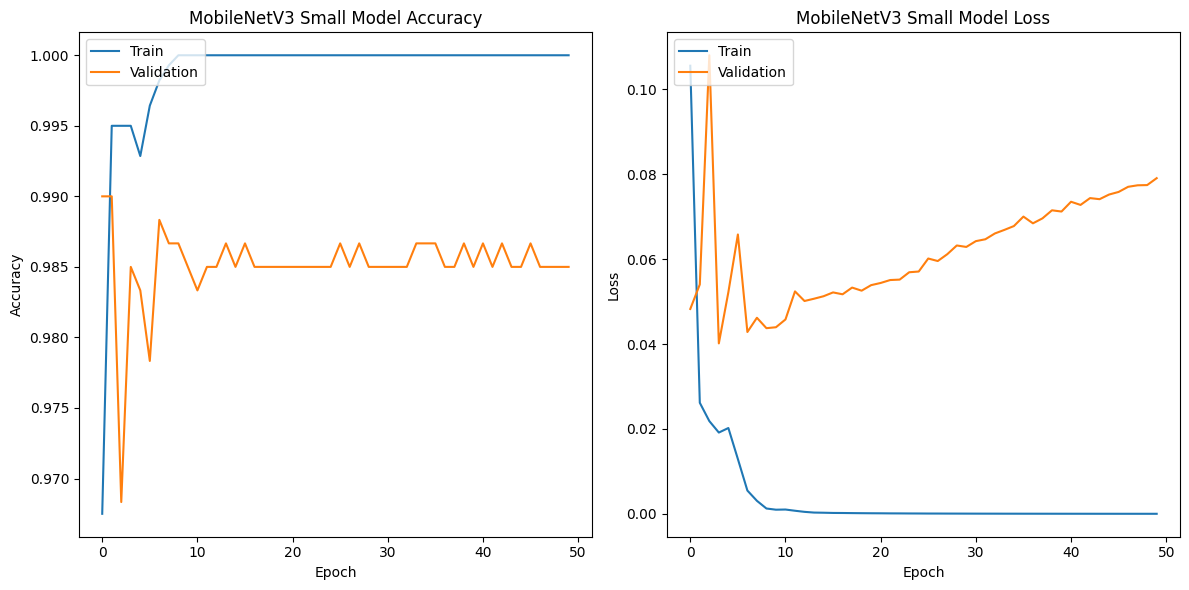

In [26]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MobileNetV3 Small Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MobileNetV3 Small Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

Found 2800 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Epoch 1/50
88/88 [==============================] - ETA: 0s - loss: 0.2013 - accuracy: 0.9271  
Epoch 1: val_accuracy improved from -inf to 0.98667, saving model to best_mobilenetv3_small_model.h5
88/88 [==============================] - 75s 797ms/step - loss: 0.2013 - accuracy: 0.9271 - val_loss: 0.0363 - val_accuracy: 0.9867
Epoch 2/50
88/88 [==============================] - ETA: 0s - loss: 0.0824 - accuracy: 0.9707  
Epoch 2: val_accuracy did not improve from 0.98667
88/88 [==============================] - 60s 682ms/step - loss: 0.0824 - accuracy: 0.9707 - val_loss: 0.0381 - val_accuracy: 0.9850
Epoch 3/50
88/88 [==============================] - ETA: 0s - loss: 0.0756 - accuracy: 0.9718  
Epoch 3: val_accuracy improved from 0.98667 to 0.99000, saving model to best_mobilenetv3_small_model.h5
88/88 [==============================] - 62s 700ms/step - loss: 0.07

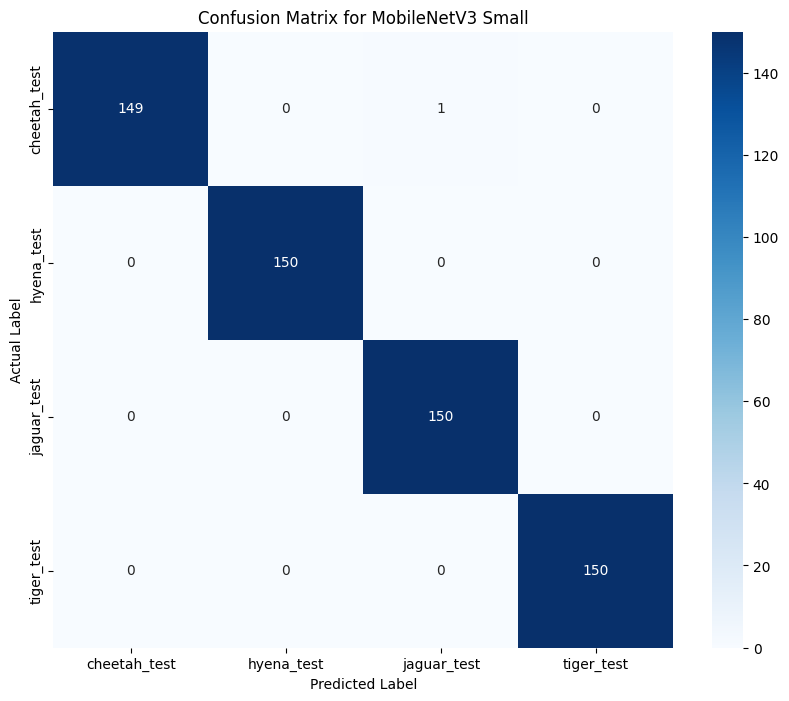

Classification Report for MobileNetV3 Small
              precision    recall  f1-score   support

cheetah_test       1.00      0.99      1.00       150
  hyena_test       1.00      1.00      1.00       150
 jaguar_test       0.99      1.00      1.00       150
  tiger_test       1.00      1.00      1.00       150

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



In [28]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, average_precision_score
import matplotlib.pyplot as plt

# Define image dimensions
img_height, img_width = 224, 224
batch_size = 32

# Define paths
base_dir = r'D:\[PC] S E M 6\ISB46703 - PRINCIPLES OF ARTIFICIAL INTELLIGENCE\Project\deep-learning\Dataset'
train_dir = os.path.join(base_dir, 'Train')
val_dir = os.path.join(base_dir, 'Valid')
test_dir = os.path.join(base_dir, 'Test')

# Data generators with augmentation and preprocessing
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Load the MobileNetV3 Small model
base_model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout for regularization
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Build the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint('best_mobilenetv3_small_model.h5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)

early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=[checkpoint, early_stopping]
)

# Load the best model
model = tf.keras.models.load_model('best_mobilenetv3_small_model.h5')

# Predict using the loaded model
y_pred = model.predict(test_generator)
y_true = test_generator.classes
y_pred_labels = np.argmax(y_pred, axis=1)

# Accuracy and mAP calculation
accuracy = accuracy_score(y_true, y_pred_labels)
mean_ap = average_precision_score(tf.keras.utils.to_categorical(y_true), y_pred)

print(f"Accuracy: {accuracy}")
print(f"mAP: {mean_ap}")

# Confusion matrix
conf_mat = confusion_matrix(y_true, y_pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix for MobileNetV3 Small')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Print the classification report
print('Classification Report for MobileNetV3 Small')
print(classification_report(y_true, y_pred_labels, target_names=test_generator.class_indices.keys()))

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MobileNetV3 Small Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MobileNetV3 Small Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()